<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

import pandas as pd

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")
path

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv'

---


# Test Environment


In [ ]:
import pandas as pd

# 1. Import data set from a CSV file
data = pd.read_csv('dataset.csv')

# 2. Generate statistical description of all features
description = data.describe(include='all')

print(data.columns)

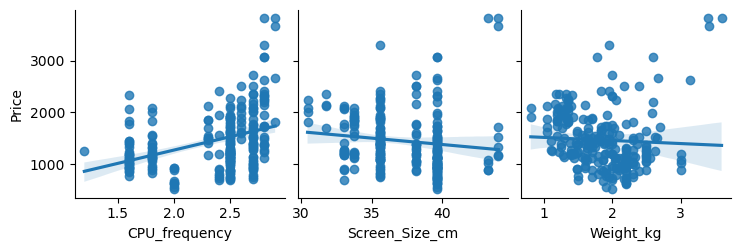

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#command for generative AI to write the code
#Write a Python code to perform the following actions.
#1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
#2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

# 1. Create regression plots
sns.pairplot(data, x_vars=['CPU_frequency', 'Screen_Size_cm', 'Weight_kg'], y_vars=['Price'], kind='reg')
plt.show()

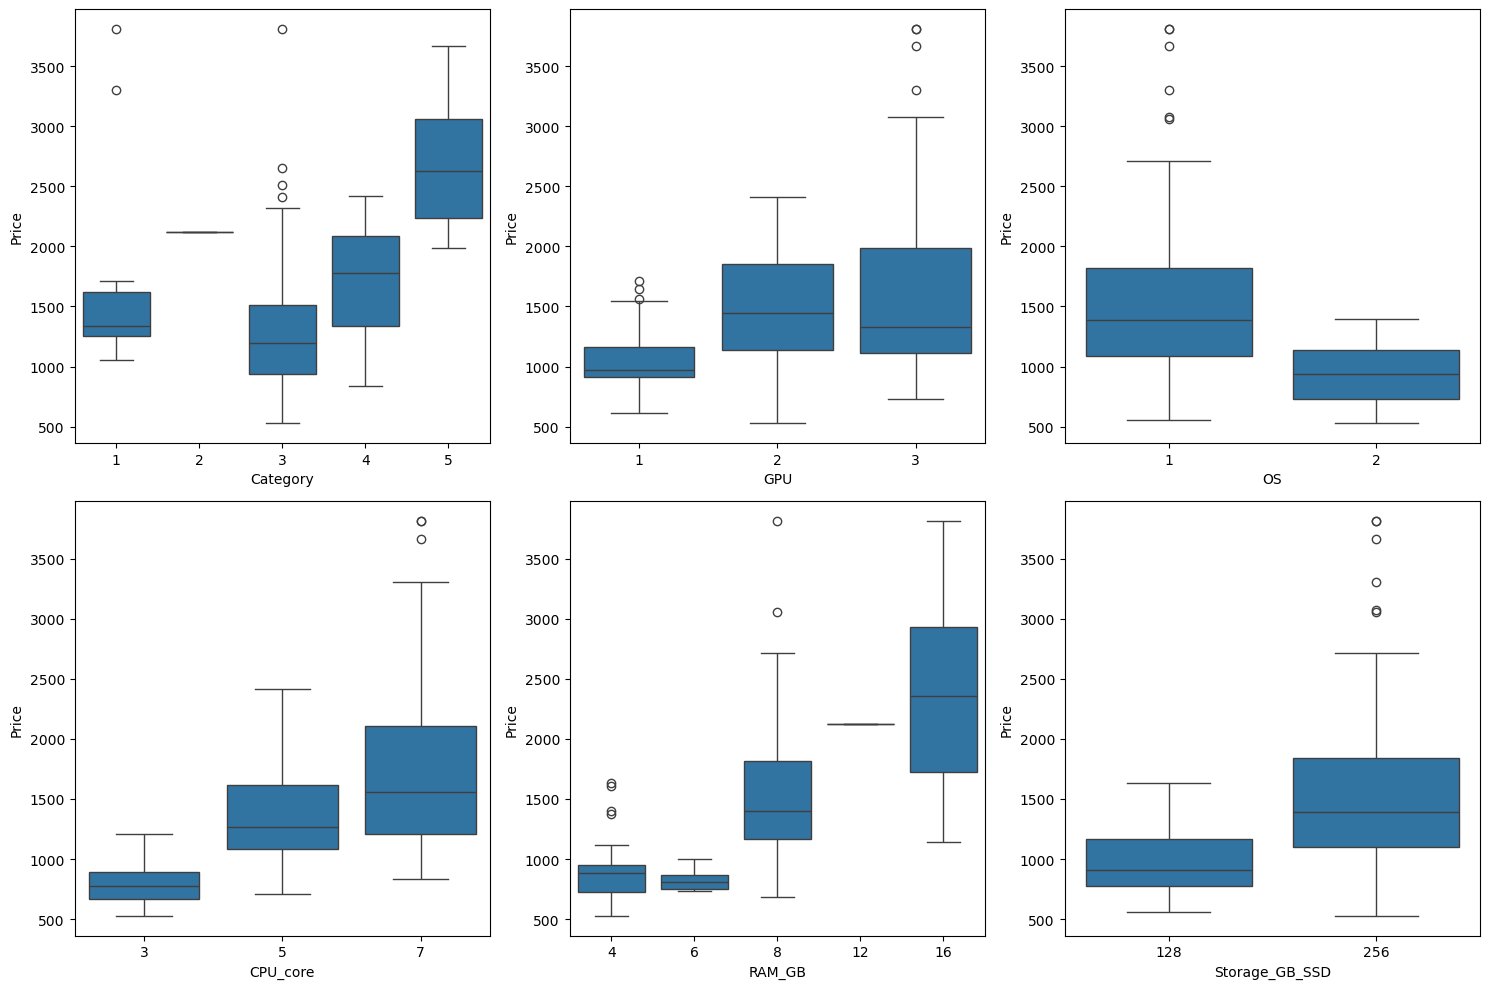

In [12]:
# 2. Create box plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x='Category', y='Price', data=data, ax=axes[0, 0])
sns.boxplot(x='GPU', y='Price', data=data, ax=axes[0, 1])
sns.boxplot(x='OS', y='Price', data=data, ax=axes[0, 2])
sns.boxplot(x='CPU_core', y='Price', data=data, ax=axes[1, 0])
sns.boxplot(x='RAM_GB', y='Price', data=data, ax=axes[1, 1])
sns.boxplot(x='Storage_GB_SSD', y='Price', data=data, ax=axes[1, 2])
plt.tight_layout()
plt.show()

In [18]:
#Write a Python code for the following.
#1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
#2. Don't include the values evaluated for target variable against itself.
#3. Print these values as a part of a single dataframe against each individual attrubute.
#4. array must not contain infs or NaNs

from scipy.stats import pearsonr

# Assuming 'data' is the DataFrame containing your dataset

# 1. Evaluate correlation value, Pearson coefficient, and p-values
correlation_data = []
for column in data.select_dtypes(include=[np.number]).columns:
    if column != 'Price':
        mask = ~np.isnan(data[column]) & ~np.isinf(data[column]) & ~np.isnan(data['Price']) & ~np.isinf(data['Price'])
        correlation, p_value = pearsonr(data.loc[mask, column], data.loc[mask, 'Price'])
        correlation_data.append([column, correlation, p_value])

# 2. Create DataFrame with the correlation values, Pearson coefficients, and p-values
correlation_df = pd.DataFrame(correlation_data, columns=['Attribute', 'Correlation', 'P-Value'])

print(correlation_df)

        Attribute  Correlation       P-Value
0      Unnamed: 0     0.321933  3.851058e-07
1        Category     0.286243  7.225696e-06
2             GPU     0.288298  6.166950e-06
3              OS    -0.221730  5.696643e-04
4        CPU_core     0.459398  7.912950e-14
5  Screen_Size_cm    -0.128233  5.009166e-02
6   CPU_frequency     0.366666  5.502463e-09
7          RAM_GB     0.549297  3.681561e-20
8  Storage_GB_SSD     0.243421  1.489892e-04
9       Weight_kg    -0.050707  4.410942e-01


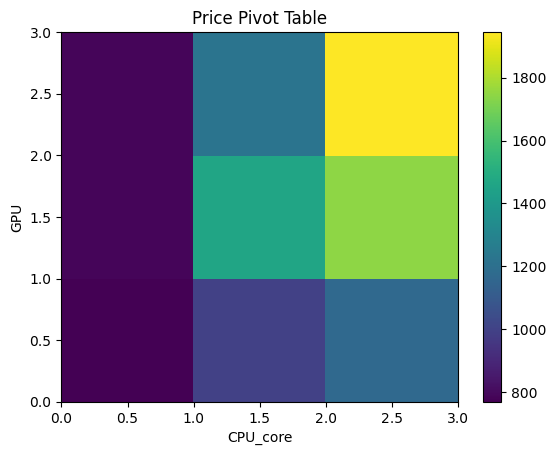

In [16]:
#Write a python code that performs the following actions.
#1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
#2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
#3. Plot a pcolor plot for this pivot table.

import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing your dataset

# 1. Group the attributes "GPU", "CPU_core", and "Price"
grouped_data = data.groupby(['GPU', 'CPU_core'])['Price'].mean().reset_index()

# 2. Create a pivot table with 'Price' as the target variable and mean as the aggregation function
pivot_table = grouped_data.pivot(index='GPU', columns='CPU_core', values='Price')

# 3. Plot a pcolor plot for the pivot table
plt.pcolor(pivot_table, cmap='viridis')
plt.colorbar()
plt.xlabel('CPU_core')
plt.ylabel('GPU')
plt.title('Price Pivot Table')
plt.show()

In [8]:
print(data.columns)

Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_kg', 'Price'],
      dtype='object')


In [11]:
#Write a Python code that performs the following tasks.
#1. Develops and trains a linear regression model that uses one attribute of a data frame as the source variable and another as a target variable.
#2. Calculate and display the MSE and R^2 values for the trained model
#3. Input X contains NaN.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Select the source and target variables
source_variable = 'Screen_Size_cm'
target_variable = 'Price'

X = data[[source_variable]]
y = data[target_variable]

# Handle NaN values in the input data
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  262118.77922255718
R^2 Score:  -0.1373520236751995


In [12]:
#Write a Python code that performs the following tasks.
#1. Develops and trains a linear regression model that uses some attributes of a data frame as the source variables and one of the attributes as a target variable.
#2. Calculate and display the MSE and R^2 values for the trained model.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Select the source variables and target variable
source_variables = ['Screen_Size_cm', 'RAM_GB', 'CPU_frequency']
target_variable = 'Price'

X = data[source_variables]
y = data[target_variable]

# Handle NaN values in the input data
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  201423.8589615537
R^2 Score:  0.1260075516684832


In [13]:
#Write a Python code that performs the following tasks.
#1. Develops and trains multiple polynomial regression models, with orders 2, 3, and 5, that use one attribute of a data frame as the source variable and another as a target variable.
#2. Calculate and display the MSE and R^2 values for the trained models.
#3. Compare the performance of the models.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Select the source and target variables
source_variable = 'Screen_Size_cm'
target_variable = 'Price'

X = data[[source_variable]]
y = data[target_variable]

# Handle NaN values in the input data
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train polynomial regression models of different orders
orders = [2, 3, 5]
for order in orders:
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    X_test_poly = poly_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Polynomial Regression Model (Order {order}):")
    print("Mean Squared Error: ", mse)
    print("R^2 Score: ", r2)
    print("---------------------")

Polynomial Regression Model (Order 2):
Mean Squared Error:  245661.85933548748
R^2 Score:  -0.06594427794811031
---------------------
Polynomial Regression Model (Order 3):
Mean Squared Error:  252468.57545661714
R^2 Score:  -0.09547910325864728
---------------------
Polynomial Regression Model (Order 5):
Mean Squared Error:  230977.19591715574
R^2 Score:  -0.002226479073242693
---------------------


In [14]:
#Write a Python code that performs the following tasks.
#1. Create a pipeline that performs parameter scaling, Polynomial Feature generation, and Linear regression. Use the set of multiple features as before to create this pipeline.
#2. Calculate and display the MSE and R^2 values for the trained model.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Select the source variables and target variable
source_variables = ['Screen_Size_cm', 'RAM_GB', 'CPU_frequency']
target_variable = 'Price'

X = data[source_variables]
y = data[target_variable]

# Handle NaN values in the input data
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for parameter scaling, polynomial feature generation, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate MSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  164180.75587037773
R^2 Score:  0.2876080245316951


In [15]:
#1. Use polynomial features for some of the attributes of a data frame.
#2. Perform Grid search on a ridge regression model for a set of values of hyperparameter alpha and polynomial features as input.
#3. Use cross-validation in the Grid search.
#4. Evaluate the resulting model's MSE and R^2 values.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Select the source variables and target variable
source_variables = ['Screen_Size_cm', 'RAM_GB', 'CPU_frequency']
target_variable = 'Price'

X = data[source_variables]
y = data[target_variable]

# Handle NaN values in the input data
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and Ridge regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Define the hyperparameters for Grid search
param_grid = {
    'poly_features__degree': [2, 3],
    'ridge__alpha': [0.1, 1, 10]
}

# Perform Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from Grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate MSE and R^2 values for the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  167988.77226514393
R^2 Score:  0.2710847705869699


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

import pandas as pd

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")
path

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv'

In [7]:
import pandas as pd

# 1. Import data set from a CSV file
df = pd.read_csv('dataset.csv')

# 2. Generate statistical description of all features
description = df.describe(include='all')

# 2. Print the first 5 rows of the dataframe
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [8]:
print(df.columns)

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'price'],
      dtype='object')


In [9]:
# 1. Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

# 2. Replace missing values with mean value of the column
df.fillna(df.mean(), inplace=True)

# 3. Delete duplicate entries from the data frame
df.drop_duplicates(inplace=True)

print("Data frame after handling missing values and duplicates:")
print(df)

Columns with missing values: ['tax']


<ipython-input-9-47c726f3a729>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Data frame after handling missing values and duplicates:
         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0       Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1        Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2        Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3       Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4       Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17961    B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4   
17962    B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0   
17963    Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6   
17964       KA  2018       Manual     5007   Petrol  145.0  57.7         1.2   
17965    Focus  2015       Manual     5007   Petrol   22.0  57.

In [12]:
# Assuming 'price' is the target attribute in your dataframe
target = 'price'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the correlation values with the target attribute
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

# Exclude the target attribute itself from the list
top_correlated_attributes = correlation_with_target[1:6]

print("Top 5 attributes with the highest correlation with the target 'price':")
print(top_correlated_attributes)

<ipython-input-12-716c7194cd3f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Top 5 attributes with the highest correlation with the target 'price':
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


In [14]:
# Assuming 'attribute' is the specific attribute you want to count unique values for
attribute = 'fuelType'

# Count the number of entries for each unique value of the attribute
value_counts = df[attribute].value_counts()

print("Number of entries for each unique value of the attribute fuelType:")
print(value_counts)

Number of entries for each unique value of the attribute fuelType:
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


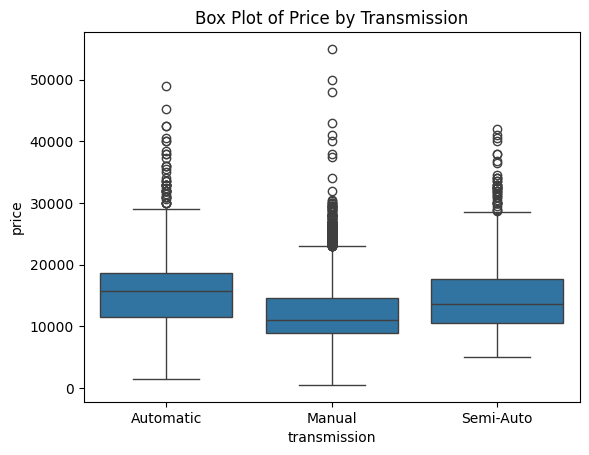

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'transmission' is the source attribute and 'price' is the target attribute
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Box Plot of Price by Transmission')
plt.show()

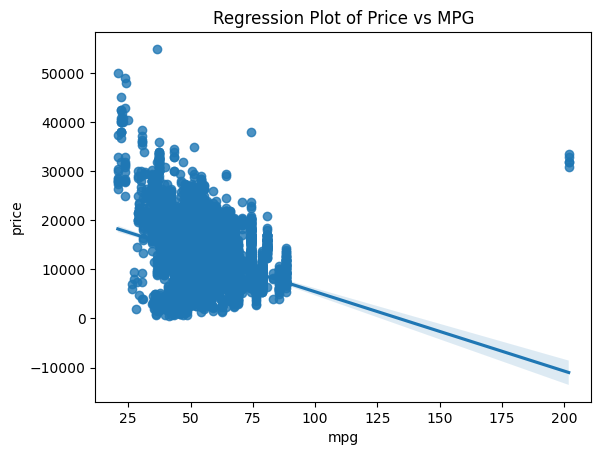

In [17]:
# Assuming 'mpg' is the source attribute and 'price' is the target attribute
sns.regplot(x='mpg', y='price', data=df)
plt.title('Regression Plot of Price vs MPG')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'mpg' is the source variable and 'price' is the target variable
X = df[['mpg']]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)
print("R^2 value:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.1198980224962416
Mean Squared Error (MSE): 19741690.809446193


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you already have a dataframe named 'df' with the necessary data

# Selecting the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating R^2 and MSE values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 value: {r2}")
print(f"MSE value: {mse}")

R^2 value: 0.6917125923771564
MSE value: 6912744.910746688


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you already have a dataframe named 'df' with the necessary data

# Selecting the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Calculating R^2 and MSE values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 value: {r2}")
print(f"MSE value: {mse}")

R^2 value: 0.12122807147174242
MSE value: 19704749.61491952


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you already have a dataframe named 'df' with the necessary data

# Selecting the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = ridge_model.predict(X_test)

# Calculating R^2 and MSE values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 value for Ridge Regression: {r2}")
print(f"MSE value for Ridge Regression: {mse}")

R^2 value for Ridge Regression: 0.6917134446113138
MSE value for Ridge Regression: 6912725.801054926


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you already have a dataframe named 'df' with the necessary data

# Selecting the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Creating and fitting the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred = ridge_model.predict(X_test_poly)

# Calculating R^2 and MSE values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 value for Ridge Regression with Polynomial Features: {r2}")
print(f"MSE value for Ridge Regression with Polynomial Features: {mse}")

/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2 value for Ridge Regression with Polynomial Features: 0.6732748888228912
MSE value for Ridge Regression with Polynomial Features: 7326174.516559619


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you already have a dataframe named 'df' with the necessary data

# Selecting the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Creating and fitting the Ridge regression model with Grid Search
parameters = {'alpha': [0.1, 1, 10]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, parameters, cv=5)
grid_search.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred = grid_search.predict(X_test_poly)

# Calculating R^2 and MSE values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 value for Ridge Regression with Polynomial Features and Grid Search: {r2}")
print(f"MSE value for Ridge Regression with Polynomial Features and Grid Search: {mse}")

/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.70036e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.76253e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.75058e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.74584e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.64902e-24): res

R^2 value for Ridge Regression with Polynomial Features and Grid Search: 0.6732748888228912
MSE value for Ridge Regression with Polynomial Features and Grid Search: 7326174.516559619


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
